In [1]:
from copy import deepcopy
from typing import Tuple, List
from PIL import Image, ImageDraw
from IPython.display import display, HTML
import math

In [2]:
class BoardLinja:
    
    def __init__(self, board: List[List[str]]):
        self.setMatrix(board)
    
    def __eq__(self, other) -> bool:
        return self.board == other.board
        '''
        for row in range(len(self.board)):
            for col in range(len(self.board[row])):
                if self.board[row][col] != other.board[row][col]:
                    return False
        '''
        return True
    
    #Función que devuelve la matriz tablero
    def getMatrix(self) -> List[List[str]]:
        #return deepcopy(self.board)
        return [''.join(row) + '\n' for row in self.board]

    #Establece el tablero
    def setMatrix(self, board: List[List[str]]):
        self.board = deepcopy(board)
    
    #Función que coloca una ficha donde se le indique
    def placeTile(self, row: int, col: int, tile: str):
        self.board[row][col] = tile
    
    #Función que establece el valor de una celda a 'vacia'
    def deleteTile(self, row: int, col: int):
        self.board[row][col] = "N"

    #Crea el tablero en modo grafico
    def getVisualMatrix(self) -> Image.Image:
        cell_size = 50
        board_size = (len(self.board[0]) * cell_size, len(self.board) * cell_size)
        visual_matrix = Image.new("RGB", board_size, color="white")

        for row_index, row in enumerate(self.board):
            for col_index, cell in enumerate(row):
                cell_image = Image.open("CasillaRoja.png").resize((cell_size, cell_size)) if cell == "R" else \
                             Image.open("CasillaNegra.png").resize((cell_size, cell_size)) if cell == "B" else \
                             Image.open("CasillaVacia.png").resize((cell_size, cell_size))

                visual_matrix.paste(cell_image, (col_index * cell_size, row_index * cell_size))

        return visual_matrix
            
    def showVisualMatrix(self, visual_matrix):
        display(visual_matrix)
        
    #Función que devuelve el valor de puntos 
    def utility(self) -> int:
        PointsR = 0
        PointsB = 0
        for row in range(len(self.board)):
            for col in range(len(self.board[row])):
                if self.board[row][col] == "R":
                    if row == 0:
                        PointsR += 5
                    if row == 1:
                        PointsR += 3
                    if row == 2:
                        PointsR += 2
                    if row == 3:
                        PointsR += 1
                if self.board[row][col] == "B":
                    if row == 7:
                        PointsB += 5
                    if row == 6:
                        PointsB += 3
                    if row == 5:
                        PointsB += 2
                    if row == 4:
                        PointsB += 1
           
        return PointsB - PointsR
    
    #Función que calcula el número de celdas a saltar en el 2º movimiento
    def jump(self, row: int) -> int:
        tiles = 0
        for cell in self.board[row]:
            if cell != "N":
                tiles+=1
        return tiles
    
    #Función que calcula quien es el ganador
    def endGame(self) -> int:
        puntosUtilidad = self.utility()
        victory = 0
        if (puntosUtilidad == 0):
            victory = 0
        if (puntosUtilidad > 0):
            victory = 1
        if (puntosUtilidad < 0):
            victory = 2
        return victory
    
    #Devuelve una lista de todas las filas a las que se puede mover
    def isAvailable(self) -> List[Tuple[int, int]]:
        available_positions = []
        for row in range(len(self.board)):
            for col in range(len(self.board[row])):
                if self.board[row][col] == "N":
                    available_positions.append((row, col))
        return available_positions

    #Verifica si un movimiento es legal
    def legalMove(self, playerID: int, row: int, col: int) -> bool:

        if playerID == 1:
            if self.board[row][col] != "R":
                return False
            if row > 7:
                return False
        
        return True 
    
    # Función que recoge el movimiento que se desea hacer
    def obtenerMov(self, playerID: int) -> List[int]:
        
        if playerID == 1:
            board_matrix = self.getMatrix()
            print("Que ficha deseas mover:\n")
            row = int(input("Fila\n"))
            col = int(input("Columna\n"))
            
            # Devolver directamente las coordenadas del movimiento
            return [row, col]
    
        # TODO: Lógica para el jugador 2
        elif playerID == 2:
            print("TODO")
            # Devolver directamente las coordenadas del movimiento
            return [row, col]
    
        # Error
        else:
            print("Error en el ID del jugador")
            return []

    def obtenerMov2(self, playerID: int, jump: int) -> List[int]:
        
        if playerID == 1:
            board_matrix = self.getMatrix()
            print("Que ficha deseas mover " + str(jump) + " casillas:\n")
            row = int(input("Fila\n"))
            col = int(input("Columna\n"))
            
            # Devolver directamente las coordenadas del movimiento
            return [row, col]
    
        # TODO: Lógica para el jugador 2
        elif playerID == 2:
            print("TODO")
            # Devolver directamente las coordenadas del movimiento
            return [row, col]
    
        # Error
        else:
            print("Error en el ID del jugador")
            return []
    
    #Función que comprueba si se ha finalizado el juego
    def finish(self) -> int:
        endGame = 0
        RedPieces = 12
        BlackPieces = 12
        matrix = self.getMatrix()

        #Recorre toda la matriz
        for row in range(len(matrix)):
            for col in range(len(matrix[row])):
                if matrix[row][col] == 'R':
                    RedPieces -= 1
                if matrix[row][col] == 'B':
                    BlackPieces -= 1
                if RedPieces == 0 and BlackPieces == 12:
                    endGame = 1
                    break
                if BlackPieces == 0 and RedPieces == 12:
                    endGame = 1
                    break
                    
        return endGame

    #Función que Realiza lo de los turnos
    def turn(self, playerID: int, mov: int, jump: int) -> 'BoardLinja':

        
        
        matrix = self.getMatrix()
        #Turno del primer jugador
        if playerID == 1:
            # Obtener la matriz visual y mostrarla
            visual_matrix = boardInstance.getVisualMatrix()
            boardInstance.showVisualMatrix(visual_matrix)
            if mov == 1:
                #Que ficha desea mover
                movement = self.obtenerMov(playerID)
                OldRow, OldCol = movement
                tokenRow = OldRow - jump
                legal = self.legalMove(playerID, OldRow, OldCol)

                if legal == False:
                    print("Movimiento Ilegal, prueba otra vez")
                    self.turn(playerID, mov, jump)
                
                if legal == True:
                    #jumps = self.jump(tokenRow)
                    tiles = 0
                    for cell in self.board[tokenRow]:
                        if cell != "N":
                            tiles+=1
                    jump = tiles

                    for newCol in range(len(self.board[tokenRow])):
                        if self.board[tokenRow][newCol] == 'N':
                            # Guarda el valor de la columna en la variable lastNewCol
                            lastNewCol = newCol

                    self.placeTile(tokenRow, lastNewCol, "R")
                    self.deleteTile(OldRow, OldCol)
                    mov += 1
                    self.turn(playerID, mov, jump)
                    return jump
                    
                else:
                    print("Error")
                    return 0
            #Segundo movimiento
            else:
                #Que ficha desea mover
                movement = self.obtenerMov2(playerID, jump)
                OldRow, OldCol = movement
                tokenRow = OldRow - jump
                legal = self.legalMove(playerID, OldRow, OldCol)

                if legal == False:
                    print("Movimiento Ilegal, prueba otra vez")
                    self.turn(playerID, mov, jump)
                
                if legal == True:
                    for newCol in range(len(self.board[tokenRow])):
                        if self.board[tokenRow][newCol] == 'N':
                            # Guarda el valor de la columna en la variable lastNewCol
                            lastNewCol = newCol

                    self.placeTile(tokenRow, lastNewCol, "R")
                    self.deleteTile(OldRow, OldCol)

                    return 0
                    
                else:
                    print("Error")
                    return 0
                    
        elif playerID == 2:
            movMachine1, movMachine2 = self.miniMax(playerID)
            
            return movMachine2

    #Función del MiniMax
    def miniMax(self, PlayerID: int) -> Tuple['BoardLinja', 'BoardLinja']:

        bestMove = BoardLinja(self.board)
        bestMove, bestMove2 = self.generateSuccessors(PlayerID)

        return bestMove, bestMove2

      #Función que devuelve una instancia con el mejor 1º movimiento para la maquina
    def generateSuccessors(self, PlayerID: int) -> Tuple['BoardLinja', 'BoardLinja']:
        counter = 0

        #Recorremos la matriz
        for row in range(len(self.board)):
            for col in range(len(self.board[row])):

                oldCol = col
                #Si encontramos una "B" y el contador esta a 0 inicializamos el nuevo tablero y movemos la ficha.
                if self.board[row][col] == "B" and counter == 0:
                    bestBoard1 = BoardLinja(self.board)

                    newRow = row + 1
                    newCol = -1
                    #Bucle que encuentra la primera celda vacia
                    for col in range(len(bestBoard1.board[newRow])):
                        if self.board[newRow][col] == 'N' and newCol == -1:
                            newCol = col

                    #Calculamos el número de movimientos para el segundo turno
                    tiles = 0
                    for cell in self.board[newRow]:
                        if cell != "N":
                            tiles+=1
                    jump = tiles

                    bestBoard1.placeTile(newRow, newCol, "B")
                    bestBoard1.deleteTile(row, oldCol)

                    #New 
                    enemyBoard1 = BoardLinja(bestBoard1.board)
                    secondBoard, enemyBoard1 = self.generateSuccessor2(bestBoard1, jump)

                    counter += 1
                    break
                
                if self.board[row][col] == "B" and counter != 0:
                    posibleBoard = BoardLinja(self.board)

                    newRow = row + 1
                    if newRow > 7:
                        break
                    newCol = -1
                    #Bucle que encuentra la primera celda vacia
                    for col in range(len(self.board[newRow])):
                        if self.board[newRow][col] == 'N' and newCol == -1:
                            newCol = col

                    #Calculamos el número de movimientos para el segundo turno
                    tiles = 0
                    for cell in self.board[newRow]:
                        if cell != "N":
                            tiles+=1
                    jump = tiles

                    posibleBoard.placeTile(newRow, newCol, "B")
                    posibleBoard.deleteTile(row, col)

                    enemyBoard2 = BoardLinja(posibleBoard.board)
                    posibleBoard, enemyBoard2 = self.generateSuccessor2(posibleBoard, jump)
                    
                    if enemyBoard1.utility() < enemyBoard2.utility():
                        bestBoard1 = posibleBoard
                        enmyBoard1 = enemyBoard2
                    break
        return bestBoard1, secondBoard

    def generateSuccessor2(self, newBoard: 'BoardLinja', jump: int) -> Tuple['BoardLinja', 'BoardLinja']:
        counter = 0

        if counter == 0:
            for row in range(len(newBoard.board)):
                for col in range(len(newBoard.board[row])):
                    newRow = row + jump
                    if newBoard.board[row][col] == "B" and newRow <= 7:
                        secondBoard = BoardLinja(newBoard.board)
                        newCol = -1
                        oldCol = col
                        #Bucle que encuentra la primera celda vacia
                        for col in range(len(newBoard.board[newRow])):
                            if newBoard.board[newRow][col] == 'N' and newCol == -1:
                                newCol = col
                                secondBoard.placeTile(newRow, newCol, "B")
                                secondBoard.deleteTile(row, oldCol)
                            if newCol != -1:
                                break

                        enemyBoard1 = BoardLinja(secondBoard.board)
                        enemyBoard1 = self.generateSuccessors3(secondBoard)
                        
                        counter += 1
                        break
        else:
            for row in range(len(newBoard.board)):
                for col in range(len(newBoard.board[row])):
                    newRow = row + jump
                    if newBoard.board[row][col] == "B" and newRow <= 7:
                        posibleBoard = newBoard
                        newCol = -1
                        oldCol = col
                        #Bucle que encuentra la primera celda vacia
                        for col in range(len(newBoard.board[newRow])):
                            if newBoard.board[newRow][col] == 'N' and newCol == -1:
                                newCol = col
                                posibleBoard.placeTile(newRow, newCol, "B")
                                posibleBoard.deleteTile(row, oldCol)
                            if newCol != -1:
                                break

                        enemyBoard2 = BoardLinja(posibleBoard.board)
                        enemyBoard2 = self.generateSuccessors3(secondBoard)
                        break
                        
            if enemyBoard2.utility() > enemyBoard1.utility():
                secondBoard = posibleBoard
                enemyBoard1 = enemyBoard2
                    
        
        return secondBoard, enemyBoard1
    
    def generateSuccessors3(self, newBoard: 'BoardLinja') -> 'BoardLinja':

        counter = 0

        for row in range(len(newBoard.board)):
            for col in range(len(newBoard.board[row])):
                if newBoard.board[row][col] == "R" and counter == 0:
                    thirdBoard = BoardLinja(newBoard.board)

                    newRow = row - 1
                    newCol = -1
                    #Bucle que encuentra la primera celda vacia
                    for col in range(len(thirdBoard.board[newRow])):
                        if self.board[newRow][col] == 'N':
                            newCol = col

                    tiles = 0
                    for cell in newBoard.board[newRow]:
                        if cell != "N":
                            tiles+=1
                    jump = tiles

                    if newCol != -1:
                        thirdBoard.placeTile(newRow, newCol, "B")
                        thirdBoard.deleteTile(row, col)

                    thirdBoard = self.generateSuccessors4(thirdBoard, jump)
                    
                    counter += 1
                    break
                    
                if self.board[row][col] == "R" and counter != 0:
                    posibleBoard = BoardLinja(newBoard.board)

                    newRow = row - 1
                    for col in range(len(posibleBoard.board[newRow])):
                        if self.board[newRow][col] == 'N':
                            newCol = col

                    
                    posibleBoard.placeTile(newRow, newCol, "R")
                    posibleBoard.deleteTile(row, col)

                    posibleBoard = self.generateSuccessors4(thirdBoard, jump)
                    
                    if thirdBoard.utility() < posibleBoard.utility():
                        thirdBoard = posibleBoard
                    break
        return thirdBoard

    def generateSuccessors4(self, newBoard: 'BoardLinja', jump: int) -> 'BoardLinja':
        counter = 0
        fourthBoard = BoardLinja(newBoard.board)  # Inicializa fourthBoard aquí
    
        if counter == 0:
            for row in range(len(newBoard.board)):
                for col in range(len(newBoard.board[row])):
                    newRow = row - jump
                    if newBoard.board[row][col] == "R" and newRow >= 0:
                        fourthBoard = BoardLinja(newBoard.board)
                        newCol = -1
                        for col in range(len(newBoard.board[newRow])):
                            if newBoard.board[newRow][col] == 'N':
                                newCol = col
                        if newCol != -1:
                            fourthBoard.placeTile(newRow, newCol, "R")
                            fourthBoard.deleteTile(row, col)
                        counter += 1
                        break
        else:
            for row in range(len(newBoard.board)):
                for col in range(len(newBoard.board[row])):
                    newRow = row - jump
                    if newBoard.board[row][col] == "R" and newRow >= 0:
                        posibleBoard = BoardLinja(newBoard.board)
                        newCol = -1
                        for col in range(len(newBoard.board[newRow])):
                            if newBoard.board[newRow][col] == 'N':
                                newCol = col
                        if newCol != -1:
                            posibleBoard.placeTile(newRow, newCol, "R")
                            posibleBoard.deleteTile(row, col)
                            break
            if posibleBoard.utility() > fourthBoard.utility():
                fourthBoard = posibleBoard
    
        return fourthBoard


# Juego
---

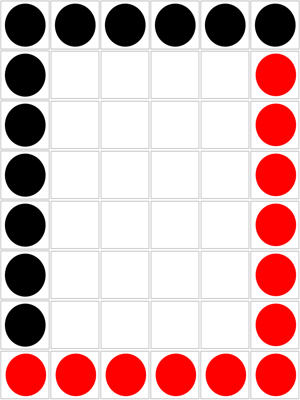

Que ficha deseas mover:



Fila
 7
Columna
 0


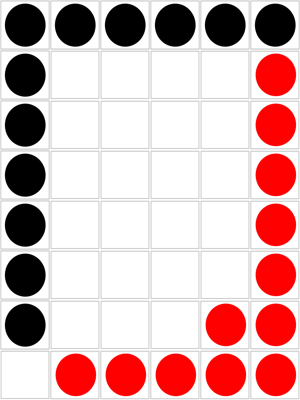

Que ficha deseas mover 2 casillas:



Fila
 6
Columna
 4


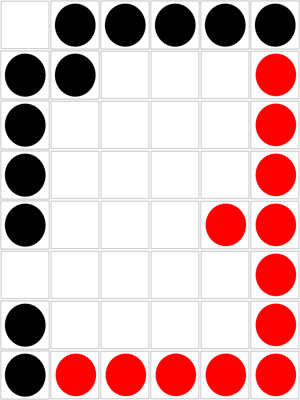

Que ficha deseas mover:



Fila
 7
Columna
 1


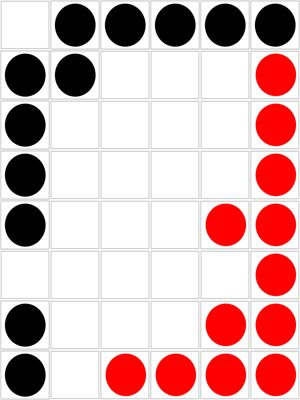

Que ficha deseas mover 2 casillas:



Fila
 6
Columna
 4


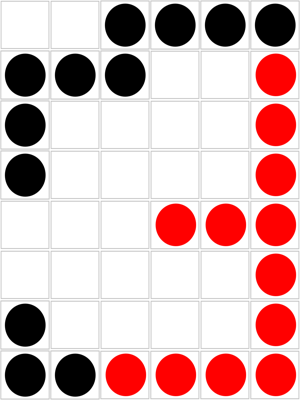

Que ficha deseas mover:



In [ ]:
'''
Carga del tablero inicial
'''
fileHandler = open ("gameStart.txt", "r",encoding="utf-8")
board = [list(line.strip()) for line in fileHandler.readlines()]
fileHandler.close()


'''
Creación de una instancia de la clase tablero
'''
boardInstance = BoardLinja(board)

'''
Declaración de variables para la correcta inicialización del código
'''
PlayerID = 1 #Jugador real
mov = 1      #Primer o segundo movimiento
jump = 1     #Numero de casillas a saltar en el segundo movimiento
endGame = 0  #Variable que termina el juego

'''
Bucle principal del juego
'''
while True:

    endGame = boardInstance.finish()
    winner = boardInstance.endGame()
    # Si endGame es 1 finaliza el juego
    if endGame == 1:
        break
        
    # Comienza el turno
    if PlayerID == 1:
        boardInstance.turn(PlayerID, mov, jump)
        PlayerID += 1
    else:
        movMachine2 = boardInstance.turn(PlayerID, mov, jump)
        PlayerID -= 1
        boardInstance = movMachine2
    

if winner == 0:
    print("Empate")
elif winner == 1:
    print("Ganaste")
elif winner == 2:
    printf("Perdiste")
else:
    print("Ni idea de quien gano")